<a href="https://colab.research.google.com/github/Someshwarms/sentiment-analysis-using-ML/blob/main/Sentimentr_Analysis_with_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import joblib

In [ ]:
data=pd.read_csv("/content/drive/MyDrive/data123.csv")
data.head(n=5)

,package_name,review,polarity
0,com.facebook.katana,privacy at least put some option appear offlin...,0
1,com.facebook.katana,"messenger issues ever since the last update, i...",0
2,com.facebook.katana,profile any time my wife or anybody has more t...,0
3,com.facebook.katana,the new features suck for those of us who don'...,0
4,com.facebook.katana,forced reload on uploading pic on replying com...,0


In [ ]:
#Preprocess the data

In [ ]:
def preprocess_data(data):
  # Remove package name as it's not relevant
  data=data.drop('package_name',axis=1)
  # Convert text to lowercase
  data['review']=data['review'].str.strip().str.lower()
  return data


In [ ]:
data=preprocess_data(data)

In [ ]:
data.head(n=5)

,review,polarity
0,privacy at least put some option appear offlin...,0
1,"messenger issues ever since the last update, i...",0
2,profile any time my wife or anybody has more t...,0
3,the new features suck for those of us who don'...,0
4,forced reload on uploading pic on replying com...,0


In [ ]:
X=data['review']
y=data['polarity']

In [ ]:
X

0      privacy at least put some option appear offlin...
1      messenger issues ever since the last update, i...
2      profile any time my wife or anybody has more t...
3      the new features suck for those of us who don'...
4      forced reload on uploading pic on replying com...
                             ...                        
886    loved it i loooooooooooooovvved it because it ...
887    all time legendary game the birthday party lev...
888    ads are way to heavy listen to the bad reviews...
889    fun works perfectly well. ads aren't as annoyi...
890    they're everywhere i see angry birds everywher...
Name: review, Length: 891, dtype: object

In [ ]:
y

0      0
1      0
2      0
3      0
4      0
      ..
886    1
887    1
888    0
889    1
890    1
Name: polarity, Length: 891, dtype: int64

In [ ]:
y.value_counts()

0    584
1    307
Name: polarity, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


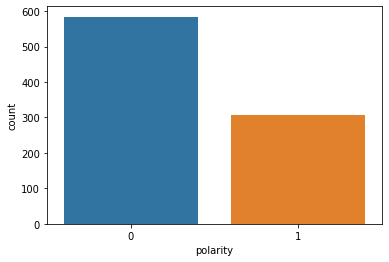

In [ ]:
sns.countplot('polarity',data=data)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y,test_size=0.25,random_state=42)

In [ ]:
X_train

597    fantastic and helpful i find this app so helpf...
60     awsome great type of social media nothing wron...
660    cannot use properly ???????????ˆ ??š??????????...
876    2many adds. great game ruined by too many adds...
504               now perfect, with animated gif support
                             ...                        
76     i hated it i am able to log in successfully bu...
870    kinda like a 2d kingdom havoc fun! if kingdom ...
80     bugs with contact syncing very frustrated. aft...
414    we have wifi with full internet connection. an...
785    keeps crashing i really do love the browser ov...
Name: review, Length: 668, dtype: object

In [ ]:
y_train.value_counts()

0    438
1    230
Name: polarity, dtype: int64

In [ ]:
y_test.value_counts()

0    146
1     77
Name: polarity, dtype: int64

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vec=CountVectorizer(stop_words='english')
X=vec.fit_transform(X).toarray()
X_test=vec.transform(X_test).toarray()

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
model=MultinomialNB()
model.fit(X,y)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
model.score(X_test,y_test)*100

95.96412556053812

In [ ]:
model.predict(vec.transform(['Love this app simply awesome!']))

array([1])